# The Sunyaev-Zeldovich signal for a single pointing

Now having the scattering kernel for a population of electrons, we can simulate the SZ signal along a single line-of-sight. For this, we convolve the background intensity from the CMB with the scattering kernel. The convolution happens over $s$.

We first show the spectral distortion arising from a thermal Maxwellian electron population. Note that we also generate the CMBR because we want to plot specifically the SZ distortion. `MockSZ` generates the total instensity after the galaxy cluster, so to plot the difference between the CMBR and the Comptonised CMBR, we need to subtract the unperturbed CMBR from the Comptonised CMBR.

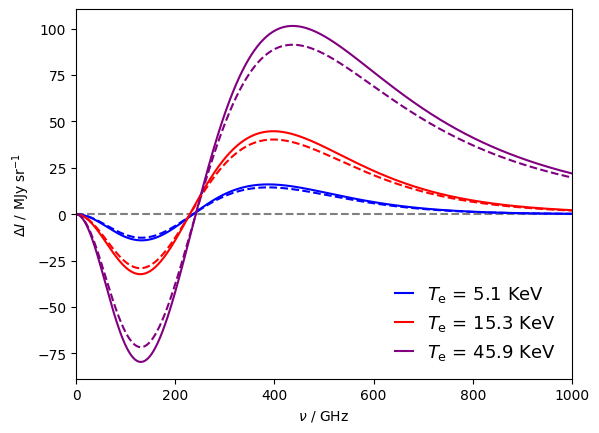

In [25]:
import numpy as np
import matplotlib.pyplot as pt

import MockSZ.SinglePointing as MSPointing
import MockSZ.Conversions as MConv
from MockSZ.Backgrounds import CMB

Te = np.array([1, 3, 9]) * 59e6
tau_e = 1
num_arr = 1000
tau_e1 = 0.9
nu = np.linspace(1, 1000, num=num_arr) * 1e9

cmb = CMB()

I0 = cmb.getSpecificIntensity(nu)
   
SZ0 = MConv.SI_JySr(MSPointing.getSpecIntensityRM(nu, Te[0], tau_e) - I0)
SZ1 = MConv.SI_JySr(MSPointing.getSpecIntensityRM(nu, Te[1], tau_e) - I0)
SZ2 = MConv.SI_JySr(MSPointing.getSpecIntensityRM(nu, Te[2], tau_e) - I0)

SZ0t = MConv.SI_JySr(MSPointing.getSpecIntensityRM(nu, Te[0], tau_e1) - I0)
SZ1t = MConv.SI_JySr(MSPointing.getSpecIntensityRM(nu, Te[1], tau_e1) - I0)
SZ2t = MConv.SI_JySr(MSPointing.getSpecIntensityRM(nu, Te[2], tau_e1) - I0)

nu_plot = nu * 1e-9

fig, ax = pt.subplots(1,1)
ax.plot(nu_plot, SZ0 * 1e-6, label=r"$T_\mathrm{e}$ = 5.1 KeV", color="blue")
ax.plot(nu_plot, SZ1 * 1e-6, label=r"$T_\mathrm{e}$ = 15.3 KeV", color="red")
ax.plot(nu_plot, SZ2 * 1e-6, label=r"$T_\mathrm{e}$ = 45.9 KeV", color="purple")

ax.plot(nu_plot, SZ0t * 1e-6, color="blue", ls="dashed")
ax.plot(nu_plot, SZ1t * 1e-6, color="red", ls="dashed")
ax.plot(nu_plot, SZ2t * 1e-6, color="purple", ls="dashed")
ax.axhline(y=0, zorder=0, color="grey", ls="dashed")
#ax.set_ylim(0, 5)
ax.set_xlim(0, 1000)

ax.set_ylabel(r"$\Delta I$ / MJy sr$^{-1}$")
ax.set_xlabel(r"$\nu$ / GHz")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

We plot the SZ signal for three different $T_\mathrm{e}$. For each $T_\mathrm{e}$, we plot the signal with $\tau_\mathrm{e}=1$ as solid lines and the signal with $\tau_\mathrm{e}=0.9$ as dashed lines.

It is evident that the general relativistic treatment we followed deviates from the conventional approach, which involves the Kompaneets equation. For example, in the Kompaneets equation, the null around $\nu \approx 218$ GHz is independent of $T_\mathrm{e}$. For our case, this does seem to be the case. The Kompaneets equation is derived by solving a non-relativistic diffusion equation and therefore not that accurate for hot gases. That is why, for increasing $T_\mathrm{e}$, our solution deviates increasingly from the Kompaneets solution.

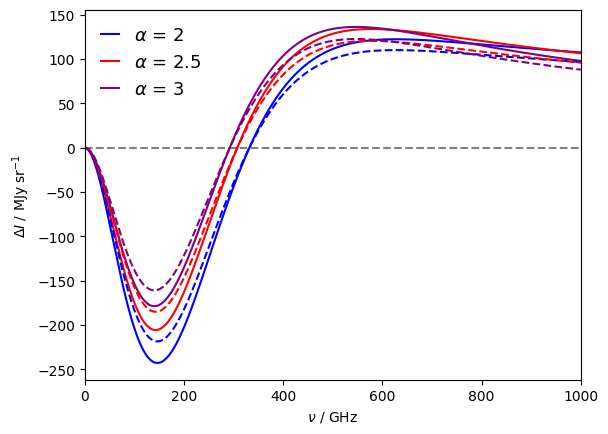

In [20]:
alpha = np.array([2, 2.5, 3])
s = np.linspace(-1.4, 10, num=num_arr)

SZ0 = MConv.SI_JySr(MSPointing.getSpecIntensityPL(nu, alpha[0], tau_e) - I0)
SZ1 = MConv.SI_JySr(MSPointing.getSpecIntensityPL(nu, alpha[1], tau_e) - I0)
SZ2 = MConv.SI_JySr(MSPointing.getSpecIntensityPL(nu, alpha[2], tau_e) - I0)

SZ0t = MConv.SI_JySr(MSPointing.getSpecIntensityPL(nu, alpha[0], tau_e1) - I0)
SZ1t = MConv.SI_JySr(MSPointing.getSpecIntensityPL(nu, alpha[1], tau_e1) - I0)
SZ2t = MConv.SI_JySr(MSPointing.getSpecIntensityPL(nu, alpha[2], tau_e1) - I0)

fig, ax = pt.subplots(1,1)
ax.plot(nu_plot, SZ0 * 1e-6, label=r"$\alpha$ = 2", color="blue")
ax.plot(nu_plot, SZ1 * 1e-6, label=r"$\alpha$ = 2.5", color="red")
ax.plot(nu_plot, SZ2 * 1e-6, label=r"$\alpha$ = 3", color="purple")

ax.plot(nu_plot, SZ0t * 1e-6, color="blue", ls="dashed")
ax.plot(nu_plot, SZ1t * 1e-6, color="red", ls="dashed")
ax.plot(nu_plot, SZ2t * 1e-6, color="purple", ls="dashed")

ax.axhline(y=0, zorder=0, color="grey", ls="dashed")
#ax.set_ylim(0, 5)
ax.set_xlim(0, 1000)

ax.set_ylabel(r"$\Delta I$ / MJy sr$^{-1}$")
ax.set_xlabel(r"$\nu$ / GHz")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()